In [99]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
experiments = pd.read_csv("../results/experiments.csv")

In [101]:
experiments

,RUN,modelname,data,num_units,num_blocks,epochs,batch_size,learningrate,optimizer,dropout,...,AE_1,AE_2,AE_3,AE_4,AE_5,TC_t_1,TC_t_2,TC_t_3,TC_t_4,TC_t_5
0,0,LSTM,sepsis,100,1,200,128,0.01,SGD,0.2,...,13.279066,13.305151,13.702989,13.697975,14.252190,0.0,0.522157,0.375058,0.207147,0.352109
1,1,LSTM,sepsis,100,2,200,128,0.01,NADAM,0.2,...,13.088323,12.995992,13.546844,13.513524,14.385354,0.0,0.222451,0.075847,0.053280,0.050395
2,2,LSTM,sepsis,100,1,200,128,0.15,SGD,0.2,...,13.258012,13.292715,13.690941,13.672309,14.301986,0.0,0.093754,0.556188,0.164670,0.162651
3,3,LSTM,sepsis,100,3,200,128,0.01,NADAM,0.2,...,13.119736,13.057548,13.635226,13.610984,14.501351,0.0,0.241259,0.118412,0.066348,0.068881
4,4,LSTM,sepsis,100,3,200,2048,0.15,NADAM,0.2,...,14.069542,14.065826,14.618429,14.615691,15.472431,0.0,0.022535,0.032047,0.022890,0.022894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,LSTM,hospital_billing,100,2,200,512,0.01,NADAM,0.2,...,68.495705,47.525898,43.594043,40.912486,42.775438,0.0,2.018714,1.102609,1.243505,0.989672
380,380,LSTM,hospital_billing,100,3,200,512,0.01,NADAM,0.2,...,70.141357,45.567152,43.031971,39.529110,41.776631,0.0,1.663968,1.205717,1.005330,1.449894
381,381,LSTM,hospital_billing,100,1,200,1024,0.01,NADAM,0.2,...,70.594858,44.398268,43.791607,40.639306,42.838153,0.0,2.281065,0.935463,0.840534,1.071561
382,382,LSTM,hospital_billing,100,2,200,2048,0.20,SGD,0.2,...,71.102811,49.505132,47.811938,43.540795,44.852613,0.0,0.314367,4.464346,2.843424,2.569899


In [102]:
experiments.columns

Index(['RUN', 'modelname', 'data', 'num_units', 'num_blocks', 'epochs',
       'batch_size', 'learningrate', 'optimizer', 'dropout', 'early_stop',
       'lr_reduce', 'sgd_momentum', 'loss_function', 'alpha', 'beta', 'gamma',
       'n_estimators', 'max_depth', 'eta', 'subsample', 'colsample_bytree',
       'y_transformation', 'sim_save_eventlog', 'sim_statespace_size',
       'sim_number_of_traces', 'sim_process_entropy', 'sim_process_type',
       'sim_process_memory', 'sim_med_ent_e_steps',
       'sim_med_ent_n_transitions', 'sim_med_ent_max_trials',
       'sim_inter_arrival_time', 'sim_process_stability_scale',
       'sim_resource_availability_p', 'sim_resource_availability_n',
       'sim_resource_availability_m', 'sim_activity_duration_lambda_range',
       'sim_deterministic_offset_W', 'Deterministic_offset_u',
       'data_inference_tables', 'data_last_state', 'data_n_traces',
       'data_max_prefix_length', 'data_min_prefix_length', 'data_split_mode',
       'data_train_ra

In [103]:
results = experiments[['RUN', 'modelname', 'data', 'num_units', 'num_blocks', 'epochs',
       'batch_size', 'learningrate', 'optimizer', 'dropout', 'loss_function',
       'y_transformation','TRAIN_MAE', 'VAL_MAE']]

results = results.loc[results.loss_function == "MAE"]
results

,RUN,modelname,data,num_units,num_blocks,epochs,batch_size,learningrate,optimizer,dropout,loss_function,y_transformation,TRAIN_MAE,VAL_MAE
0,0,LSTM,sepsis,100,1,200,128,0.01,SGD,0.2,MAE,none,11.972655,14.747710
1,1,LSTM,sepsis,100,2,200,128,0.01,NADAM,0.2,MAE,none,10.717358,14.678934
2,2,LSTM,sepsis,100,1,200,128,0.15,SGD,0.2,MAE,none,12.016487,14.756055
3,3,LSTM,sepsis,100,3,200,128,0.01,NADAM,0.2,MAE,none,10.641204,14.634117
4,4,LSTM,sepsis,100,3,200,2048,0.15,NADAM,0.2,MAE,none,12.855932,15.659240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,LSTM,hospital_billing,100,2,200,512,0.01,NADAM,0.2,MAE,none,28.071519,35.723513
380,380,LSTM,hospital_billing,100,3,200,512,0.01,NADAM,0.2,MAE,none,29.681762,33.242292
381,381,LSTM,hospital_billing,100,1,200,1024,0.01,NADAM,0.2,MAE,none,32.089418,35.982069
382,382,LSTM,hospital_billing,100,2,200,2048,0.20,SGD,0.2,MAE,none,45.526412,43.819392


In [104]:
top_candidates = 1

GS = []

for log in ["sepsis","helpdesk","traffic_fines","hospital_billing"]:
    
    #subset per dataset
    subset = results.loc[results.data == log]

    #get lowest MAE
    subset = subset.sort_values("VAL_MAE", ascending=True)
    subset["RANK"] = list(range(1,len(subset)+1))

    #get top2 performers
    GS.append(subset.head(top_candidates))

GS = pd.concat(GS)
GS.index = list(range(0,len(GS)))

In [105]:
GS.columns

Index(['RUN', 'modelname', 'data', 'num_units', 'num_blocks', 'epochs',
       'batch_size', 'learningrate', 'optimizer', 'dropout', 'loss_function',
       'y_transformation', 'TRAIN_MAE', 'VAL_MAE', 'RANK'],
      dtype='object')

In [106]:
GS = GS[['data','loss_function','num_units', 'num_blocks','optimizer','batch_size',"learningrate","TRAIN_MAE","VAL_MAE","RANK","RUN"]]

GS["VAL_MAE"] = np.round(GS["VAL_MAE"],decimals=2)
GS["TRAIN_MAE"] = np.round(GS["TRAIN_MAE"],decimals=2)

GS["DIST"] = GS["TRAIN_MAE"] - GS["VAL_MAE"]
GS["DIST"] = np.round(GS["DIST"],decimals=3)

In [107]:
#GS.head(top_candidates)

In [108]:
#GS.loc[GS.data == "helpdesk"].DIST.hist(bins=20)

In [109]:
GS

,data,loss_function,num_units,num_blocks,optimizer,batch_size,learningrate,TRAIN_MAE,VAL_MAE,RANK,RUN,DIST
0,sepsis,MAE,100,2,NADAM,1024,0.10,11.17,14.32,1,65,-3.15
1,helpdesk,MAE,100,1,SGD,2048,0.10,6.84,7.39,1,162,-0.55
2,traffic_fines,MAE,100,1,NADAM,128,0.10,148.43,142.91,1,209,5.52
3,hospital_billing,MAE,100,2,NADAM,128,0.01,29.56,32.92,1,376,-3.36


In [110]:
GS.RUN.values

array([ 65, 162, 209, 376], dtype=int64)

In [111]:
#GS.loc[GS.data == "sepsis"]

# Training history

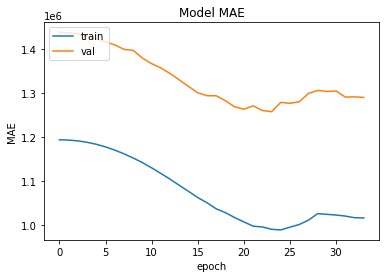

In [113]:
runno = 85

hist = pd.read_csv("../results/train_hist_"+str(runno)+".csv")
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

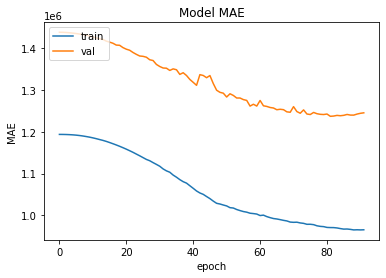

In [114]:
runno = 65

hist = pd.read_csv("../results/train_hist_"+str(runno)+".csv")
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Latex table

In [115]:
#Event-log & FX & Cells & Blocks & Epochs & BS & LR & Optimizer & Dropout & Loss & MAE \\ \hline
GS = GS[['data','loss_function','num_units', 'num_blocks','optimizer','batch_size',"learningrate","TRAIN_MAE","VAL_MAE"]]

GS.columns = ['Event-log',"Loss",'Units','Layers','Alg','BS','LR',"Train MAE","Val MAE"]

In [116]:
string = GS.to_latex(index=False)

string = string.replace('llrrlrrrr', '|l|l|r|r|l|r|r|r|r|')

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')


string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE &","$MAE$ &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

print(string)

\begin{tabular}{|l|l|r|r|l|r|r|r|r|}
\hline
       Event-log & Loss &  Units &  Layers &   Alg &   BS &   LR &  Train $MAE$ &  Val MAE \\
\hline
          Sepsis &  $MAE$ &    100 &       2 & NADAM & 1024 & 0.10 &      11.17 &    14.32 \\
        Helpdesk &  $MAE$ &    100 &       1 &   SGD & 2048 & 0.10 &       6.84 &     7.39 \\
   Traffic fines &  $MAE$ &    100 &       1 & NADAM &  128 & 0.10 &     148.43 &   142.91 \\
Hospital billing &  $MAE$ &    100 &       2 & NADAM &  128 & 0.01 &      29.56 &    32.92 \\
\hline
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_21092\96471479.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = GS.to_latex(index=False)


In [117]:
GS

,Event-log,Loss,Units,Layers,Alg,BS,LR,Train MAE,Val MAE
0,sepsis,MAE,100,2,NADAM,1024,0.10,11.17,14.32
1,helpdesk,MAE,100,1,SGD,2048,0.10,6.84,7.39
2,traffic_fines,MAE,100,1,NADAM,128,0.10,148.43,142.91
3,hospital_billing,MAE,100,2,NADAM,128,0.01,29.56,32.92


# Conditional hyper-parameters for main experiments

In [118]:
code = ""

for evlog in GS["Event-log"]:
    #print(evlog)
    
    sub = GS.loc[GS["Event-log"] == evlog]
        
    val = sub.LR.values[0]    
    line = "df.loc[(df['data'] == '"+ evlog +"'), 'learningrate'] = "+ str(val)+"\n"
    code = code + line
    
    val = sub.Layers.values[0]    
    line = "df.loc[(df['data'] == '"+ evlog +"'), 'num_blocks'] = "+ str(val)+"\n"
    code = code + line
        
    val = sub.Units.values[0]    
    line = "df.loc[(df['data'] == '"+ evlog +"'), 'num_units'] = "+ str(val)+"\n"
    code = code + line
    
    
    val = sub.BS.values[0]    
    line = "df.loc[(df['data'] == '"+ evlog +"'), 'batch_size'] = "+ str(val)+"\n"
    code = code + line
    
    
    val = sub.Alg.values[0]    
    line = "df.loc[(df['data'] == '"+ evlog +"'), 'optimizer'] = '"+ str(val)+"'\n"
    code = code + line+"\n"
    
print(code)

df.loc[(df['data'] == 'sepsis'), 'learningrate'] = 0.1
df.loc[(df['data'] == 'sepsis'), 'num_blocks'] = 2
df.loc[(df['data'] == 'sepsis'), 'num_units'] = 100
df.loc[(df['data'] == 'sepsis'), 'batch_size'] = 1024
df.loc[(df['data'] == 'sepsis'), 'optimizer'] = 'NADAM'

df.loc[(df['data'] == 'helpdesk'), 'learningrate'] = 0.1
df.loc[(df['data'] == 'helpdesk'), 'num_blocks'] = 1
df.loc[(df['data'] == 'helpdesk'), 'num_units'] = 100
df.loc[(df['data'] == 'helpdesk'), 'batch_size'] = 2048
df.loc[(df['data'] == 'helpdesk'), 'optimizer'] = 'SGD'

df.loc[(df['data'] == 'traffic_fines'), 'learningrate'] = 0.1
df.loc[(df['data'] == 'traffic_fines'), 'num_blocks'] = 1
df.loc[(df['data'] == 'traffic_fines'), 'num_units'] = 100
df.loc[(df['data'] == 'traffic_fines'), 'batch_size'] = 128
df.loc[(df['data'] == 'traffic_fines'), 'optimizer'] = 'NADAM'

df.loc[(df['data'] == 'hospital_billing'), 'learningrate'] = 0.01
df.loc[(df['data'] == 'hospital_billing'), 'num_blocks'] = 2
df.loc[(df['data'] == 'h